In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation


In [6]:
df = pd.read_csv('dataset.csv')
df

,valve_position_percent,water_level_cm,water_level_percent,historical_rainfall_mm,generated_voltage_v,generated_power_w
0,0,45,22.5,0.0,0.00,0.00
1,5,47,23.5,0.2,1.85,2.31
2,10,52,26.0,0.5,3.92,7.84
3,15,58,29.0,0.8,6.15,18.45
4,20,65,32.5,1.2,8.52,34.08
...,...,...,...,...,...,...
207,100,65,32.5,5.5,27.84,763.56
208,24,75,37.5,1.2,9.82,47.28
209,44,96,48.0,2.5,18.78,149.41
210,64,100,50.0,3.6,28.50,314.50


In [40]:
train_input = np.array(df['valve_position_percent'][0:160]).reshape(160, 1)
train_output = np.array(df['water_level_percent'][0:160]).reshape(160, 1)

test_input = np.array(df['valve_position_percent'][160:212]).reshape(52, 1)
test_output = np.array(df['water_level_percent'][160:212]).reshape(52, 1)

In [41]:
class LinearRegression:
    def __init__(self):
        self.parameter = {}
    
    def forward_propagation(self, train_input):
        valve = self.parameter['valve']
        water = self.parameter['water']
        predicted_water_level = (valve * train_input) + water
        return predicted_water_level
    
    def cost_function(self, predicted_output, train_output):
        cost = np.mean((train_output - predicted_output) ** 2) 
        return cost 

    def backward_propagation(self, train_input, train_output, predicted_output):
        derivatives = {}
        df = (predicted_output - train_output)
        derivatives['d_valve'] = 2 * np.mean(np.multiply(train_input, df))
        derivatives['d_water'] = 2 * np.mean(df)
        return derivatives

    def update_parameter(self, derivatives, learning_rate):
        self.parameter['valve'] - self.parameter['valve'] - learning_rate * derivatives['d_valve'] 
        self.parameter['water'] -= self.parameter['water'] - learning_rate * derivatives['d_water']
        
    def train(self, train_input, train_output, learning_rate, iters):
        self.parameter['valve'] = np.random.uniform(0, 1) * -1
        self.parameter['water'] = np.random.uniform(0, 1) * -1
        self.loss = []
        
        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameter['valve'] * x_vals + self.parameter['water'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, color='blue', label='Data Points')
        ax.set_ylim(0, max(train_output) + 1) 
        
        def update(frame): 
            predictions = self.forward_propagation(train_input) 
            cost = self.cost_function(predictions, train_output) 
            derivatives = self.backward_propagation(train_input, train_output, predictions) 
            self.update_parameter(derivatives, learning_rate) 
            line.set_ydata(self.parameter['valve'] * x_vals + self.parameter['water']) 
            self.loss.append(cost) 
            print("Iteration = {}, Loss = {}".format(frame + 1, cost)) 
            return line, 
        
        animation = FuncAnimation(fig, update, frames=iters, interval=200, blit=True) 
        animation.save('linear_regression_A.gif', writer='ffmpeg') 

        plt.xlabel('Input') 
        plt.ylabel('Output') 
        plt.title('Linear Regression') 
        plt.legend() 
        plt.show() 

        return self.parameter, self.loss 



Iteration = 1, Loss = 2310.794571250058
Iteration = 1, Loss = 2275.5847821410143
Iteration = 1, Loss = 2275.5777683853294
Iteration = 1, Loss = 2275.5777669825793
Iteration = 2, Loss = 2275.577766982299
Iteration = 3, Loss = 2275.577766982299
Iteration = 4, Loss = 2275.577766982299
Iteration = 5, Loss = 2275.577766982299
Iteration = 6, Loss = 2275.577766982299
Iteration = 7, Loss = 2275.577766982299
Iteration = 8, Loss = 2275.577766982299
Iteration = 9, Loss = 2275.577766982299
Iteration = 10, Loss = 2275.577766982299
Iteration = 11, Loss = 2275.577766982299
Iteration = 12, Loss = 2275.577766982299
Iteration = 13, Loss = 2275.577766982299
Iteration = 14, Loss = 2275.577766982299
Iteration = 15, Loss = 2275.577766982299
Iteration = 16, Loss = 2275.577766982299
Iteration = 17, Loss = 2275.577766982299
Iteration = 18, Loss = 2275.577766982299
Iteration = 19, Loss = 2275.577766982299
Iteration = 20, Loss = 2275.577766982299


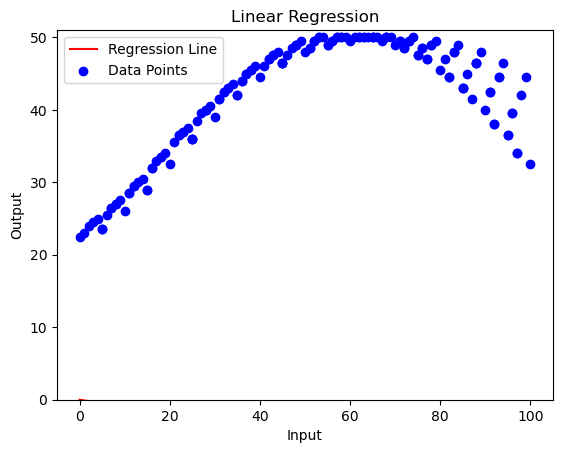

In [42]:
models = LinearRegression()
parameter, loss = models.train(train_input, train_output, 0.0001, 20)